In [6]:
import numpy as np
import matplotlib.pyplot as plt

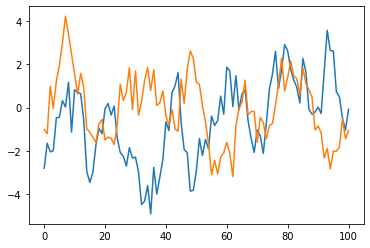

In [460]:
a = 0.8
b = 0.9
T = 101

def gen_ar1(a, T):
    X = np.zeros(T)
    X[0] = np.random.normal(0, 1 / (1 - a ** 2))

    for t in range(1, T):
        X[t] = a * X[t - 1] + np.random.normal(0, 1)
        
    return X

def exp_cost_ar(a_true, a_est, s = 1):
    return s + (a_true - a_est) ** 2 * 1 / (1 - a_true ** 2)

def exp_cost_model(a_true, a_est, a, s = 1):
    return s + (a_true - a_est) ** 2 * (1 / (1 - a ** 2) + a_true)
    
X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

plt.plot(X_1)
plt.plot(X_2)

3.7777777777777786
3.833853160804141


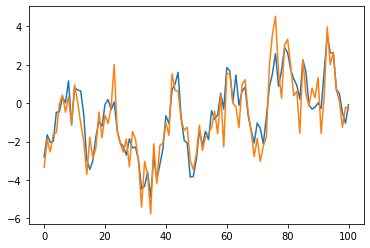

In [461]:
s = 1
Y = X_1 + np.random.normal(0, s, T)

print(1 / (1 - a ** 2) + 1)
print(np.cov(Y))
plt.plot(X_1)
plt.plot(Y)

In [612]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.8, 0.9, 100
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")

lam = 0
X_comb = np.vstack((X_1, X_2))
coefs = np.linalg.inv(X_comb @ X_comb.T + lam * np.identity(2)) @ X_comb @ Y
print(f"LS Estimates a, b:\t{np.round(coefs, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
print(f"\nLS estimate a:\t\t{round(a_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2, 4)}.")
print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y), 4)}.")

# least squares estimate of the regression Y = bX_2
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y
print(f"\nLS estimate b:\t\t{round(b_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y), 4)}.")

True a: 0.8. True b: 0.9. Time T: 100.

LS Estimates a, b:	[ 1.02 -0.08].
Emprirical risk:	1.1598.
CV using X1 and X2:	1.213.

LS estimate a:		0.96.
Emprirical risk:	1.1909.
CV Using X1:		1.2208.

LS estimate b:		0.33.
Emprirical risk:	3.7061.
CV Using X2:		3.7743.


In [645]:
def compare_cvs(a, b, T, iters = 10):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
        Y = X_1 + np.random.normal(0, 1, T)
        
        cv_ar2 = cv_nd(np.vstack((X_1, X_2)), Y)
        cv_ar1 = cv_1d(X_1, Y)
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
b = 0.5
a_range = np.linspace (-0.05, 0.95, 11)
T_range = [10, 25, 50, 100, 250, 500]
iters = 2500

for T in T_range:
    print(f"{T}:", end = "\t")
    a_list = []
    for a in a_range:
        print(round(a, 2), end = "\t")
        a_list.append(compare_cvs(a, b, T, iters = iters))
    print(np.round(a_list, 2))
    total_list.append(a_list)
    print()
    
total_list = np.array(total_list)

10:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.79 0.79 0.79 0.78 0.79 0.79 0.79 0.79 0.79 0.8  0.79]

25:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.81 0.83 0.83 0.82 0.82 0.83 0.81 0.83 0.82 0.81 0.82]

50:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.84 0.84 0.83 0.84 0.83 0.82 0.84 0.84 0.84 0.83 0.82]

100:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.83 0.84 0.84 0.84 0.83 0.85 0.84 0.84 0.84 0.84 0.84]

250:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.85 0.84 0.84 0.85 0.84 0.85 0.84 0.83 0.83 0.84 0.86]

500:	-0.05	0.05	0.15	0.25	0.35	0.45	0.55	0.65	0.75	0.85	0.95	[0.85 0.86 0.84 0.85 0.84 0.85 0.84 0.83 0.83 0.84 0.84]



### 2D grid

In [647]:
print(np.round(total_list, 2))

[[0.79 0.79 0.79 0.78 0.79 0.79 0.79 0.79 0.79 0.8  0.79]
 [0.81 0.83 0.83 0.82 0.82 0.83 0.81 0.83 0.82 0.81 0.82]
 [0.84 0.84 0.83 0.84 0.83 0.82 0.84 0.84 0.84 0.83 0.82]
 [0.83 0.84 0.84 0.84 0.83 0.85 0.84 0.84 0.84 0.84 0.84]
 [0.85 0.84 0.84 0.85 0.84 0.85 0.84 0.83 0.83 0.84 0.86]
 [0.85 0.86 0.84 0.85 0.84 0.85 0.84 0.83 0.83 0.84 0.84]]


### As a function of $T$, fixed $a$

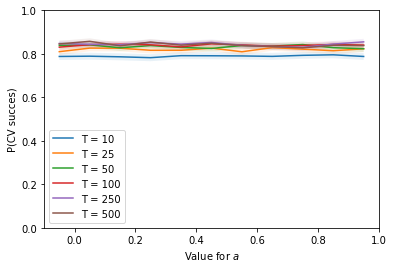

In [653]:
plt.xlabel(r"Value for $a$")
plt.ylabel(r"P(CV succes)")
plt.ylim(0, 1)
for i, a_list in enumerate(total_list):
    plt.plot(a_range, a_list, label = f"T = {round(T_range[i], 2)}")
    plt.legend()
    
    dev = 1.96 * np.sqrt(a_list * (1 - a_list) / iters)
    plt.fill_between(a_range, a_list - dev, a_list + dev, alpha = 0.1)

### As a function of $a$, fixed $T$

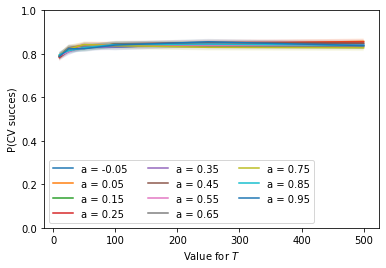

In [654]:
plt.xlabel(r"Value for $T$")
plt.ylabel(r"P(CV succes)")
plt.ylim(0, 1)
for i, T_list in enumerate(total_list.T):
    plt.plot(T_range, T_list, label = f"a = {round(a_range[i], 2)}")
    plt.legend(ncol = 3)
    
    dev = 1.96 * np.sqrt(T_list * (1 - T_list) / iters)
    plt.fill_between(T_range, T_list - dev, T_list + dev, alpha = 0.1)

In [390]:
# cross validation
# train with only a and check emprirical risk
features = X_comb.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
    features_test, labels_test = features[:, i], labels[i]
    
    # train on del set
    coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del
    
    # test on test set
    cv_scores.append(((labels_test - features_test @ coefs) ** 2))

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 0.8364.


In [391]:
# cross validation
# train with only a and check emprirical risk
features = X_1.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # test on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 0.8219.


In [392]:
# cross validation
# train with only b and check emprirical risk
features = X_2.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # train on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 2.6129.


In [547]:
def cv_1d(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        cv_scores.append((labels_test - features_test * coefs) ** 2)
    
    return np.mean(np.array(cv_scores))

def cv_nd(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
        features_test, labels_test = features[:, i], labels[i]

        # train on del set
        coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del

        # test on test set
        cv_scores.append(((labels_test - features_test @ coefs) ** 2))

    return np.mean(np.array(cv_scores))

coefs = np.linalg.inv(X_comb @ X_comb.T) @ X_comb @ Y
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y

print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y), 4)}. MSE on X1:\t{1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2}")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y), 4)}. MSE on X2:\t{1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2}")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}. MSE on X1 + X2:\t{1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2}")

CV Using X1:		0.8497. MSE on X1:	0.8373454945072866
CV Using X2:		2.1572. MSE on X2:	2.1246075534414612
CV using X1 and X2:	0.8113. MSE on X1 + X2:	0.7817394788190415


In [394]:
def MSE_1d(X, Y):
    coefs = 1 / (X @ X.T) * X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - X * coefs, 2) ** 2

def MSE_nd(X, Y):
    coefs = np.linalg.inv(X @ X.T) @ X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - coefs @ X, 2) ** 2

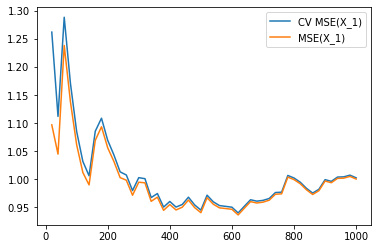

In [408]:
a, b, s = 0.5, 0.5, 1
T = 1000

X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

Y = X_1 + np.random.normal(0, s, T)

cv_1 = []
cv_2 = []
cv_12 = []

mse_1 = []
mse_2 = []
mse_12 = []

for t in range(20, T + 1, 20):
    X_1t, X_2t, Y_t = X_1[:t], X_2[:t], Y[:t]
    X_comb = np.vstack((X_1t, X_2t))
    
    cv_1.append(cv_1d(X_1t, Y_t))
    cv_2.append(cv_1d(X_2t, Y_t))
    cv_12.append(cv_nd(X_comb, Y_t))
    
    mse_1.append(MSE_1d(X_1t, Y_t))
    mse_2.append(MSE_1d(X_2t, Y_t))
    mse_12.append(MSE_nd(X_comb, Y_t))
    
plt.plot(range(20, T + 1, 20), cv_1, label = "CV MSE(X_1)")
plt.plot(range(20, T + 1, 20), mse_1, label = "MSE(X_1)")
# plt.plot(range(20, T + 1, 20), cv_2, label = "MSE(X_2)")
# plt.plot(range(20, T + 1, 20), mse_12, label = "MSE(X_1, X_2)")
# plt.plot(range(20, T + 1, 20), cv_12, label = "CV MSE(X_1, X_2)")
plt.legend()

We have a closed form solution of $$R(\hat{f}_T).$$ What is $$CV(\mathcal{F})?$$

$$CV(\mathcal{F}) = \frac{1}{T} \sum_{i = 1}^T \left(Y_i - X_i \hat{w}_{-i}\right)^2,$$ where $$\hat{w}_{-i} = (X_{-i} X_{-i}^T)^{-1} X_{-i} Y_{-i}.$$